# Analysis of Hospital Readmission Rates

Following the previous notebook describing the statistical analysis on Python, we will reproduce this study on Spark.
Spark (PySpark) is the current hot datascience framework. It make easy working with very large dataset. 

We should define the SPARK HOME PATH toward our local Spark built version. 

In [1]:
import os,sys
os.environ["SPARK_HOME"] = "/usr/lib/spark-1.6.1-bin-hadoop2.6"

Every spark script should be started by defining a spark context. The context defines an application and should be configured with a a SparkConf. 

This notebook is focusing on pySpark DataFrame and Machine learning (MLlib). Before dealing with DataFrame we have to load an useful library spark-csv from Databricks in order for parsing and querying CSV.
Please, download library and uncompressin your spark root folder. https://github.com/databricks/spark-csv

Add to your notebook environnement the path to spark-csv.

In [2]:
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-csv_2.10:1.3.0 pyspark-shell'

You can set configuration properties by passing a SparkConf object to SparkContext:

In [3]:
from IPython.display import IFrame
IFrame('https://spark.apache.org/docs/0.9.1/python-programming-guide.html', width=1000, height=350)

The Spark Context is the object through which we bridge our programs with the computing cluster that Spark provides. It's available in our environment as the variable sc.

In [4]:
import pyspark
from pyspark import SparkConf, SparkContext
conf = (SparkConf()
         .setMaster("local")
         .setAppName("HopitalReadmission")
         .set("spark.executor.memory", "1g"))
sc = SparkContext(conf = conf)

First, we create a new RDD and load dataset

In [5]:
import os
fileName = "/home/charles-abner/Documents/dataset_diabetes/diabetic_data.csv"
rawData = sc.textFile(fileName)
header = rawData.first() #extract header
print rawData.count()
rawData = rawData.filter(lambda x:x !=header)    #filter out header

101767


In [6]:
#from pyspark.sql import DataFrameReader 
#df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load(fileName)

A Spark DataFrame is a distributed collection of data organized into named columns. It is conceptually equivalent to a table in a relational database or a data frame in R or Pandas. They can be constructed from a wide array of sources such as an existing RDD in our case.

The entry point into all SQL functionality in Spark is the SQLContext class. To create a basic instance, all we need is a SparkContext reference. Since we are running Spark in shell mode (using pySpark) we can use the global context object sc for this purpose.

The entry point into all functionality in Spark SQL is the SQLContext class, or one of its descendants. To create a basic SQLContext, all you need is a SparkContext.

In [7]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row

# sc is an existing SparkContext.
sqlContext = SQLContext(sc)

We would now load data in a spark dataframe. Moreover, Spark dataframe offers best performances than RDDs and it is easier to manipulate dataframe.

First, method to create a DataFrame and inferring variable types consists in using the DataBricks library:

In [8]:
df_from_databricks = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load(fileName)
df_from_databricks.dtypes

[('encounter_id', 'int'),
 ('patient_nbr', 'int'),
 ('race', 'string'),
 ('gender', 'string'),
 ('age', 'string'),
 ('weight', 'string'),
 ('admission_type_id', 'int'),
 ('discharge_disposition_id', 'int'),
 ('admission_source_id', 'int'),
 ('time_in_hospital', 'int'),
 ('payer_code', 'string'),
 ('medical_specialty', 'string'),
 ('num_lab_procedures', 'int'),
 ('num_procedures', 'int'),
 ('num_medications', 'int'),
 ('number_outpatient', 'int'),
 ('number_emergency', 'int'),
 ('number_inpatient', 'int'),
 ('diag_1', 'string'),
 ('diag_2', 'string'),
 ('diag_3', 'string'),
 ('number_diagnoses', 'int'),
 ('max_glu_serum', 'string'),
 ('A1Cresult', 'string'),
 ('metformin', 'string'),
 ('repaglinide', 'string'),
 ('nateglinide', 'string'),
 ('chlorpropamide', 'string'),
 ('glimepiride', 'string'),
 ('acetohexamide', 'string'),
 ('glipizide', 'string'),
 ('glyburide', 'string'),
 ('tolbutamide', 'string'),
 ('pioglitazone', 'string'),
 ('rosiglitazone', 'string'),
 ('acarbose', 'string'),

It seems that method 'inferSchema' works well. You would change somee variable format by using the method  .cast()

Second method to create a DataFrame consists in creating a DataFrame from a RDD by using a sqlContext. This method doesnt make possible inferring format.

In [9]:
csv_data = rawData.map(lambda l: l.split(","))

We load the header and first row in a pandas dataframe to get information about format

In [10]:
row_patient = csv_data.map(lambda p: Row(
    encounter_id=p[0],
    patient_nbr=p[1],
    race =p[2],
    gender=p[3],
    age  =p[4],
    weight =p[5],
    admission_type_id =p[6],
    discharge_disposition_id =p[7],
    admission_source_id =p[8],
    time_in_hospital =p[9],
    payer_code =p[10],
    medical_specialty =p[11],
    num_lab_procedures =p[12],
    num_procedures =p[13],
    num_medications =p[14],
    number_outpatient =p[15],
    number_emergency =p[16],
    number_inpatient =p[17],
    diag_1   =p[18],
    diag_2 =p[19],
    diag_3 =p[20],
    number_diagnoses  =int(p[21]),
    max_glu_serum   =p[22],
    A1Cresult       =p[23],
    metformin       =p[24],
    repaglinide     =p[25],
    nateglinide     =p[26],                  
    chlorpropamide  =p[27],               
    glimepiride     =p[28],                  
    acetohexamide   =p[29],                
    glipizide       =p[30],                    
    glyburide       =p[31],                    
    tolbutamide     =p[32],                  
    pioglitazone    =p[33],                 
    rosiglitazone   =p[34],                
    acarbose        =p[35],                     
    miglitol        =p[36],                     
    troglitazone    =p[37],                 
    tolazamide      =p[38],                   
    examide         =p[39],                            
    citoglipton     =p[40],   
    insulin         =p[41],   
    glyburide_metformin  =p[42],   
    glipizide_metformin  =p[43],   
    glimepiride_pioglitazone  =p[44],   
    metformin_rosiglitazone   =p[45],   
    metformin_pioglitazone    =p[46],   
    change     =p[47],   
    diabetesMed=p[48],   
    readmitted  =p[49]           
    )
)


In [11]:
df_from_rdd = sqlContext.createDataFrame(row_patient)
df_from_rdd.registerTempTable("people")

We get easily get the data schema. Actually, Spark SQL can convert an RDD of Row objects to a DataFrame, inferring the datatypes. Rows are constructed by passing a list of key/value pairs as kwargs to the Row class. The keys of this list define the column names of the table, and the types are inferred by looking at the first row.

In [12]:
df_from_rdd.printSchema()

root
 |-- A1Cresult: string (nullable = true)
 |-- acarbose: string (nullable = true)
 |-- acetohexamide: string (nullable = true)
 |-- admission_source_id: string (nullable = true)
 |-- admission_type_id: string (nullable = true)
 |-- age: string (nullable = true)
 |-- change: string (nullable = true)
 |-- chlorpropamide: string (nullable = true)
 |-- citoglipton: string (nullable = true)
 |-- diabetesMed: string (nullable = true)
 |-- diag_1: string (nullable = true)
 |-- diag_2: string (nullable = true)
 |-- diag_3: string (nullable = true)
 |-- discharge_disposition_id: string (nullable = true)
 |-- encounter_id: string (nullable = true)
 |-- examide: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- glimepiride: string (nullable = true)
 |-- glimepiride_pioglitazone: string (nullable = true)
 |-- glipizide: string (nullable = true)
 |-- glipizide_metformin: string (nullable = true)
 |-- glyburide: string (nullable = true)
 |-- glyburide_metformin: string (nullabl

## Queries as DataFrame operations

Spark DataFrame provides a domain-specific language for structured data manipulation. This language includes methods we can concatenate in order to do selection, filtering, grouping, etc. For example, let's say we want to count how many people are there for each age interval. We can proceed as follows.

In [13]:
from time import time

t0 = time()
df_from_databricks.select("admission_type_id", "weight", "gender", "age").groupBy("age").count().show()
tt = time() - t0

print "Query performed in {} seconds".format(round(tt,3))

+--------+-----+
|     age|count|
+--------+-----+
| [70-80)|26068|
|[90-100)| 2793|
| [20-30)| 1657|
| [40-50)| 9685|
| [60-70)|22483|
|  [0-10)|  161|
| [80-90)|17197|
| [10-20)|  691|
| [30-40)| 3775|
| [50-60)|17256|
+--------+-----+

Query performed in 3.002 seconds


Now imagine we would parse the age interval to get the decade. Let's parse age to keep the second caracter.

In [14]:
def getDecade(age):
    return int(age[1])

In [15]:
row_age_parsed = csv_data.map(lambda p: Row(
    encounter_id=p[0],
    patient_nbr=p[1],
    race =p[2],
    gender=p[3],
    age  =p[4],
    age_decade  =getDecade(p[4]),
    age_string  =p[4],
    weight =p[5],
    admission_type_id =p[6],
    discharge_disposition_id =p[7],
    admission_source_id =p[8],
    time_in_hospital =p[9],
    payer_code =p[10],
    medical_specialty =p[11],
    num_lab_procedures =p[12],
    num_procedures =p[13],
    num_medications =p[14],
    number_outpatient =p[15],
    number_emergency =p[16],
    number_inpatient =p[17],
    diag_1   =p[18],
    diag_2 =p[19],
    diag_3 =p[20],
    number_diagnoses  =int(p[21]),
    max_glu_serum   =p[22],
    A1Cresult       =p[23],
    metformin       =p[24],
    repaglinide     =p[25],
    nateglinide     =p[26],                  
    chlorpropamide  =p[27],               
    glimepiride     =p[28],                  
    acetohexamide   =p[29],                
    glipizide       =p[30],                    
    glyburide       =p[31],                    
    tolbutamide     =p[32],                  
    pioglitazone    =p[33],                 
    rosiglitazone   =p[34],                
    acarbose        =p[35],                     
    miglitol        =p[36],                     
    troglitazone    =p[37],                 
    tolazamide      =p[38],                   
    examide         =p[39],                            
    citoglipton     =p[40],   
    insulin         =p[41],   
    glyburide_metformin  =p[42],   
    glipizide_metformin  =p[43],   
    glimepiride_pioglitazone  =p[44],   
    metformin_rosiglitazone   =p[45],   
    metformin_pioglitazone    =p[46],   
    change     =p[47],   
    diabetesMed=p[48],   
    readmitted  =p[49]            
    )
)
#finally we store data in a new dataframe
df_from_rdd_enriched = sqlContext.createDataFrame(row_age_parsed)

Alternatively, with the df_from_databricks we can create new variables as follow :

Be careful with variable transformation. We would often compute a new variable resulting from a transformation on already existing columns.  Contrary to pandas you could not use df[newVariable]=f(df[existingVariable]). You have to use a pySpark method call withColumns : 

In [16]:
#we convert age in string
df_from_databricks = df_from_databricks.withColumn("age_string", df_from_databricks["age"])
df_from_databricks.age_string.cast('string')

Column<cast(age_string as string)>

In [17]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

getDecadeUdf = udf(getDecade, IntegerType())

In [18]:
#let apply the udf to extract the decade from age
df_from_databricks = df_from_databricks.withColumn("age_decade", getDecadeUdf(df_from_databricks["age"]))
df_from_databricks.select("age_decade").show()

+----------+
|age_decade|
+----------+
|         0|
|         1|
|         2|
|         3|
|         4|
|         5|
|         6|
|         7|
|         8|
|         9|
|         4|
|         6|
|         4|
|         8|
|         6|
|         6|
|         5|
|         5|
|         7|
|         7|
+----------+
only showing top 20 rows



In [19]:
distAge = df_from_databricks.select('encounter_id','gender','age','age_string').groupBy("age",'gender',"age_string").count()
distAge_pd = distAge.toPandas()
print distAge_pd.head(5)

        age  gender age_string  count
0   [70-80)    Male    [70-80)  12081
1   [80-90)  Female    [80-90)  10515
2   [60-70)    Male    [60-70)  11421
3  [90-100)  Female   [90-100)   2003
4   [70-80)  Female    [70-80)  13985


In [20]:
#Another useful function is crosstable which compute a Cross Tabulation (Contingency Table)
#Cross Tabulation provides a table of the frequency distribution for a set of variables. 
print df_from_databricks.stat.crosstab("age", "gender").show()
print df_from_databricks.stat.crosstab("gender", "readmitted").show()

+----------+------+---------------+-----+
|age_gender|Female|Unknown/Invalid| Male|
+----------+------+---------------+-----+
|   [50-60)|  8572|              0| 8684|
|   [70-80)| 13985|              2|12081|
|  [90-100)|  2003|              0|  790|
|   [40-50)|  4811|              0| 4874|
|    [0-10)|    83|              0|   78|
|   [20-30)|  1114|              0|  543|
|   [30-40)|  2162|              0| 1613|
|   [60-70)| 11061|              1|11421|
|   [80-90)| 10515|              0| 6682|
|   [10-20)|   402|              0|  289|
+----------+------+---------------+-----+

None
+-----------------+----+-----+-----+
|gender_readmitted| <30|   NO|  >30|
+-----------------+----+-----+-----+
|  Unknown/Invalid|   0|    3|    0|
|             Male|5205|25823|16027|
|           Female|6152|29038|19518|
+-----------------+----+-----+-----+

None


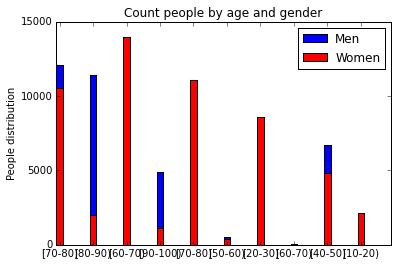

In [21]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

age = distAge_pd['age_string']
countMen = distAge_pd.loc[distAge_pd['gender'] == "Male"]["count"]
countWomen = distAge_pd.loc[distAge_pd['gender'] == "Female"]["count"]
N = 10
ind = np.arange(N) # the x locations for the groups
width = 0.2       # the width of the bars: can also be len(x) sequence

ax = plt.subplot(111)
p1 = plt.bar(ind, countMen, width, color='b')
p2 = plt.bar(ind, countWomen, width, color='r')

plt.ylabel('People distribution')
plt.title('Count people by age and gender')
plt.xticks(ind + width/2., age)
plt.yticks(np.arange(0,20000, 5000))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

### Spark Transformation and Action for feature engineering

Before processing and transform some variable we would be interested by a general data description

In [22]:
df_from_databricks[["age_decade"]].describe()
# you can note some bug. Actually, age is bigint but recognized by .describe() as string

DataFrame[summary: string, age_decade: string]

#### Filtering

Filtering is pretty much straightforward too, you can use the *RDD-like* filter method and copy any of your existing Pandas expression/predicate for filtering :

In [23]:
# use select to show a particular column
#df.select('readmitted').show()
#we would drop row with readmitted with value ">30" to have a two-classes classification.
print "There are %s patients " % df_from_databricks.count()
df_filtered = df_from_databricks.filter(df_from_databricks.readmitted !=">30").count()
print "There are %s patients with readmission value equals to '<30' or 'No'" %  df_filtered

There are 101766 patients 
There are 66221 patients with readmission value equals to '<30' or 'No'


In [24]:
#We would keep only numeric column to compute correlation 2-2
colInt = [ c[0] for c in df_from_databricks.dtypes if ((c[1] in ['bigint','int','float']) and (c[0] not in ['encounter_id','patient_nbr']))]
print colInt

['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'age_decade']


## Statistics with mllib

We are now introducing Spark's machine learning library MLlib through its basic statistics functionality in order to better understand our dataset.

In [26]:
### Descriptive and exploratory analysis

pyspark.sql already contains some basic statistical function but we will focus on mllib.Statistics which provides methods to calculate correlations between series. Firstly, we would compute a correlation matrix from the dataframe

In [27]:
from pyspark.sql import DataFrameStatFunctions
df_from_databricks.corr('num_medications','number_outpatient')

0.04519734115117919

In [29]:
from pyspark.mllib.stat import Statistics
from pyspark.mllib.stat import MultivariateStatisticalSummary
from pyspark.mllib.linalg import Vector
from math import sqrt 

In [30]:
seriesX = df_from_databricks.select('num_medications').rdd.map(lambda x:float(x[0]))
seriesY = df_from_databricks.select('number_outpatient').rdd.map(lambda x:float(x[0]))
print(Statistics.corr(seriesX, seriesY, method="pearson"))


0.0451973411512


In [31]:
rdd_from_df = df_from_databricks.select(colInt).rdd

In [205]:
data = rdd_from_df.map(lambda r:float(r[0]))
print(Statistics.corr(data, method="pearson"))

Py4JJavaError: An error occurred while calling o4343.corr.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 155.0 failed 1 times, most recent failure: Lost task 0.0 in stage 155.0 (TID 1930, localhost): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/lib/spark-1.6.1-bin-hadoop2.6/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/usr/lib/spark-1.6.1-bin-hadoop2.6/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/lib/spark-1.6.1-bin-hadoop2.6/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/lib/spark-1.6.1-bin-hadoop2.6/python/lib/pyspark.zip/pyspark/mllib/linalg/__init__.py", line 77, in _convert_to_vector
    raise TypeError("Cannot convert type %s into Vector" % type(l))
TypeError: Cannot convert type <type 'float'> into Vector

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:214)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1431)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1419)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1418)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1418)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1640)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1599)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1588)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:620)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1832)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1845)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1858)
	at org.apache.spark.rdd.RDD$$anonfun$take$1.apply(RDD.scala:1328)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:316)
	at org.apache.spark.rdd.RDD.take(RDD.scala:1302)
	at org.apache.spark.rdd.RDD$$anonfun$first$1.apply(RDD.scala:1342)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:316)
	at org.apache.spark.rdd.RDD.first(RDD.scala:1341)
	at org.apache.spark.mllib.linalg.distributed.RowMatrix.numCols(RowMatrix.scala:61)
	at org.apache.spark.mllib.linalg.distributed.RowMatrix.computeCovariance(RowMatrix.scala:328)
	at org.apache.spark.mllib.stat.correlation.PearsonCorrelation$.computeCorrelationMatrix(PearsonCorrelation.scala:49)
	at org.apache.spark.mllib.stat.correlation.Correlations$.corrMatrix(Correlation.scala:66)
	at org.apache.spark.mllib.stat.Statistics$.corr(Statistics.scala:74)
	at org.apache.spark.mllib.api.python.PythonMLLibAPI.corr(PythonMLLibAPI.scala:813)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:57)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:606)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/lib/spark-1.6.1-bin-hadoop2.6/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/usr/lib/spark-1.6.1-bin-hadoop2.6/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/lib/spark-1.6.1-bin-hadoop2.6/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/usr/lib/spark-1.6.1-bin-hadoop2.6/python/lib/pyspark.zip/pyspark/mllib/linalg/__init__.py", line 77, in _convert_to_vector
    raise TypeError("Cannot convert type %s into Vector" % type(l))
TypeError: Cannot convert type <type 'float'> into Vector

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:38)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:214)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	... 1 more


In [32]:
print(Statistics.corr(seriesX, seriesY, method="pearson"))

0.0451973411512


In [72]:
df_from_databricks[[c for c in df_from_databricks.columns if c not in ["readmitted"]]]

DataFrame[encounter_id: int, patient_nbr: int, race: string, gender: string, age: string, weight: string, admission_type_id: int, discharge_disposition_id: int, admission_source_id: int, time_in_hospital: int, payer_code: string, medical_specialty: string, num_lab_procedures: int, num_procedures: int, num_medications: int, number_outpatient: int, number_emergency: int, number_inpatient: int, diag_1: string, diag_2: string, diag_3: string, number_diagnoses: int, max_glu_serum: string, A1Cresult: string, metformin: string, repaglinide: string, nateglinide: string, chlorpropamide: string, glimepiride: string, acetohexamide: string, glipizide: string, glyburide: string, tolbutamide: string, pioglitazone: string, rosiglitazone: string, acarbose: string, miglitol: string, troglitazone: string, tolazamide: string, examide: string, citoglipton: string, insulin: string, glyburide-metformin: string, glipizide-metformin: string, glimepiride-pioglitazone: string, metformin-rosiglitazone: string, m

In [47]:
df_from_databricks.take(10)

[Row(encounter_id=2278392, patient_nbr=8222157, race=u'Caucasian', gender=u'Female', age=u'[0-10)', weight=u'?', admission_type_id=6, discharge_disposition_id=25, admission_source_id=1, time_in_hospital=1, payer_code=u'?', medical_specialty=u'Pediatrics-Endocrinology', num_lab_procedures=41, num_procedures=0, num_medications=1, number_outpatient=0, number_emergency=0, number_inpatient=0, diag_1=u'250.83', diag_2=u'?', diag_3=u'?', number_diagnoses=1, max_glu_serum=u'None', A1Cresult=u'None', metformin=u'No', repaglinide=u'No', nateglinide=u'No', chlorpropamide=u'No', glimepiride=u'No', acetohexamide=u'No', glipizide=u'No', glyburide=u'No', tolbutamide=u'No', pioglitazone=u'No', rosiglitazone=u'No', acarbose=u'No', miglitol=u'No', troglitazone=u'No', tolazamide=u'No', examide=u'No', citoglipton=u'No', insulin=u'No', glyburide-metformin=u'No', glipizide-metformin=u'No', glimepiride-pioglitazone=u'No', metformin-rosiglitazone=u'No', metformin-pioglitazone=u'No', change=u'No', diabetesMed=

### Bibliography

https://databricks.com/blog/2014/03/26/spark-sql-manipulating-structured-data-using-spark-2.html

SparkSQL Optimisation System called Catalyst 

https://databricks.com/blog/2015/04/13/deep-dive-into-spark-sqls-catalyst-optimizer.html